1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

Text(0, 0.5, 'Number Thallium atoms')

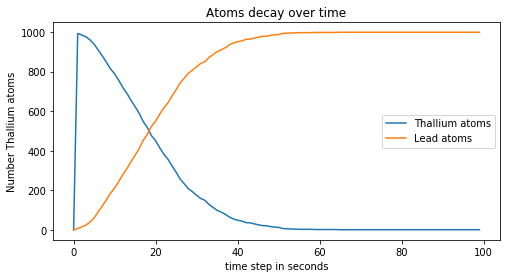

In [3]:
T = 3.052*60
N = 1000
t = 100
Nt = np.arange(t)
Np = np.arange(t)

def p(x):
    return 1-2**(-x/T)

for i in range(1,t):
    for atom in range(1,N):
        if (np.random.rand() <= p(i)):
            N = N - 1
    Nt[i] = N
    Np[i] = 1000 - N

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Nt, label = 'Thallium atoms')
ax.plot(Np, label = 'Lead atoms')
ax.legend()
plt.title('Atoms decay over time')
plt.xlabel('time step in seconds')
plt.ylabel('Number Thallium atoms')


Text(0, 0.5, 'Number of atoms')

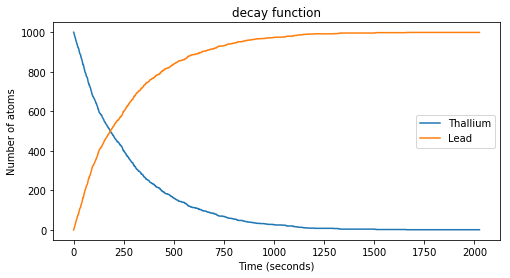

In [5]:
TL = N
PB = 0

# inverse transform method
def pdf(t):
    return 2**(-t/T)*np.log(2)/T

def cdf(t):
    return 1 - 2**(-t/T)

def icdf(p):
    return -np.log2(1-p)*T

TL = 1000
PB = 0

res = icdf(np.random.random(size=(TL,)))
res.sort()

hist = [[TL,PB]]
limit = int(np.round(res.max()))
for sec in range(1,limit):
    if TL <= 0: break
    
    dec = res[ res >= sec-1]
    dec = dec[dec < sec]
    cnt = len(dec)
    
    TL -= cnt
    PB += cnt
    hist.append([TL,PB])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(hist)
ax.legend(['Thallium','Lead']);
plt.title('decay function')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [10]:
Z = 79
alfa = 52.92
E = 1.233e-12
e =-1.621e-19
eps = 8.85e-24
std = alfa/100

def theta():
    b = ( -2*(std**2) * np.log(1-np.random.rand()) )**0.5
    return 2*np.arctan( (Z*e**2)/(2*np.pi*eps*E*b) )

pNum = int(1e6)

np.sum([1 for _ in range(particles) if theta() > np.pi/2])/pNum


0.00162

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [13]:
import math
import random
# define any function here!
def f(x):
    return math.sin(x)**2/(x*(2-x))

# define any xmin-xmax interval here! (xmin < xmax)
xmin = 0.0001
xmax = 2.0 * math.pi

# find ymin-ymax
numSteps = 1000000 # bigger the better but slower!
ymin = f(xmin)
ymax = ymin
for i in range(numSteps):
    x = xmin + (xmax - xmin) * float(i) / numSteps
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPoints = 1000000 # bigger the better but slower!
ctr = 0
for j in range(numPoints):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if math.fabs(y) <= math.fabs(f(x)):
        if f(x) > 0 and y > 0 and y <= f(x):
            ctr += 1 # area over x-axis is positive
        if f(x) < 0 and y < 0 and y >= f(x):
            ctr -= 1 # area under x-axis is negative

fnArea = rectArea * float(ctr) / numPoints
print ("Numerical integration = "  ,str(fnArea))

Numerical integration =  5.294135305700025


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [24]:
N = 10000
def r():
    return np.random.random()
def area(x, y):
    return x**2 + y**2

c = 0
for i in range(N):
    if area(r(), r()) <= 1: 
        c += 1
4*c/N

3.1436

In [27]:
# 10D
def area10D(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    return x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2 + x7**2 + x8**2 + x9**2 + x10**2

c = 0
for i in range(N):
    if area10D(r(), r(), r(), r(), r(), r(), r(), r(), r(), r()) <= 1: 
        c += 1
1000*c/N

1.7000

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [38]:
def f(x): 
    return (x**(-0.5))/(np.exp(x)+1)
def I(N):
    res = np.sum(x for x in f(np.linspace(0.0001, 1, N)))
    return res/N
print(I(1000))

0.8632439493502044


C:\Users\walidmash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
